In [6]:
import torch
import torch.nn as nn
import torchvision.models as models

class ResNetModel(nn.Module):
    def __init__(self, num_classes=1000):
        super(ResNetModel, self).__init__()
        # Load the pre-trained ResNet50 model from torchvision models
        self.resnet = models.resnet50(pretrained=True)
         
        # If you want to fine-tune the model, you can freeze the weights here
        # for param in self.resnet.parameters():
        # param.requires_grad = False
        
        # Modify the last fully connected layer to match the number of classes in your task
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)
    
    def forward(self, x):
        return self.resnet(x)

# Instantiate the ResNetModel
resnet_model = ResNetModel()


In [7]:
resnet_model

ResNetModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

In [9]:
def extract_pretrained_weights(model):
    pretrained_weights = {}
    for name, param in model.named_parameters():
        if "fc" not in name:  # Exclude the last fully connected layer weights
            pretrained_weights[name] = param.data.clone()
    return pretrained_weights


In [11]:
pretrained_weights = extract_pretrained_weights(resnet_model)

print(pretrained_weights)

{'resnet.conv1.weight': tensor([[[[ 1.3335e-02,  1.4664e-02, -1.5351e-02,  ..., -4.0896e-02,
           -4.3034e-02, -7.0755e-02],
          [ 4.1205e-03,  5.8477e-03,  1.4948e-02,  ...,  2.2060e-03,
           -2.0912e-02, -3.8517e-02],
          [ 2.2331e-02,  2.3595e-02,  1.6120e-02,  ...,  1.0281e-01,
            6.2641e-02,  5.1977e-02],
          ...,
          [-9.0349e-04,  2.7767e-02, -1.0105e-02,  ..., -1.2722e-01,
           -7.6604e-02,  7.8453e-03],
          [ 3.5894e-03,  4.8006e-02,  6.2051e-02,  ...,  2.4267e-02,
           -3.3662e-02, -1.5709e-02],
          [-8.0029e-02, -3.2238e-02, -1.7808e-02,  ...,  3.5359e-02,
            2.2439e-02,  1.7077e-03]],

         [[-1.8452e-02,  1.1415e-02,  2.3850e-02,  ...,  5.3736e-02,
            4.4022e-02, -9.4675e-03],
          [-7.7273e-03,  1.8890e-02,  6.7981e-02,  ...,  1.5956e-01,
            1.4606e-01,  1.1999e-01],
          [-4.6013e-02, -7.6075e-02, -8.9648e-02,  ...,  1.2108e-01,
            1.6705e-01,  1.7619e-0

In [12]:
import torch
import torch.nn as nn

def reshape_and_svd(weight_matrix):
    # Reshape the weight matrix into a 2D matrix
    # The first dimension will be the product of all the other dimensions
    reshaped_matrix = weight_matrix.view(weight_matrix.size(0), -1)
    
    # Perform Singular Value Decomposition (SVD)
    # The function torch.svd returns three tensors: U, S, and Vt
    U, S, Vt = torch.svd(reshaped_matrix)
    
    return U, S, Vt
# Assuming you have extracted the pretrained_weights from the ResNet model 
# For example, let's extract the first convolutional layer weight matrix
conv1_weight_matrix = pretrained_weights['resnet.conv1.weight']

# Reshape and perform SVD
U, S, Vt = reshape_and_svd(conv1_weight_matrix)

# Print the shapes of the resulting matrices
print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)


U shape: torch.Size([64, 64])
S shape: torch.Size([64])
Vt shape: torch.Size([147, 64])


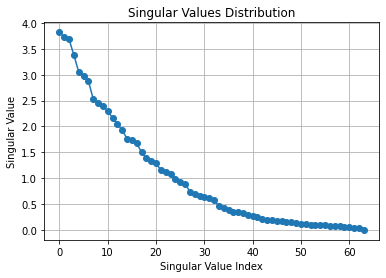

In [48]:
import matplotlib.pyplot as plt

def plot_singular_values(S):
    # Convert the singular values to a numpy array for plotting
    singular_values = S.numpy()
      
    # Plot the singular values using a linear scale
    plt.plot(singular_values, marker='o')
    plt.xlabel('Singular Value Index')
    plt.ylabel('Singular Value')
    plt.title('Singular Values Distribution')
    plt.grid(True)
    plt.show()

conv1_weight_matrix = pretrained_weights['resnet.conv1.weight']
U, S, Vt = reshape_and_svd(conv1_weight_matrix)

# Visualize the singular values
plot_singular_values(S)


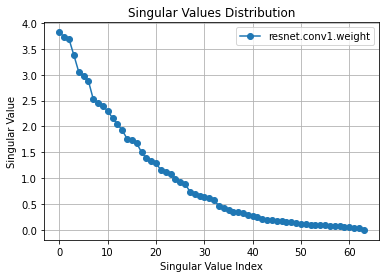

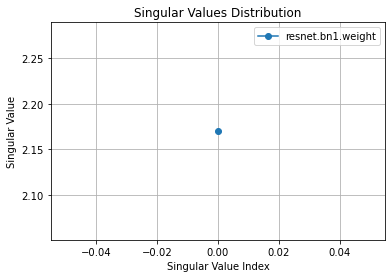

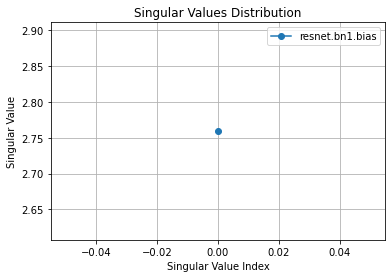

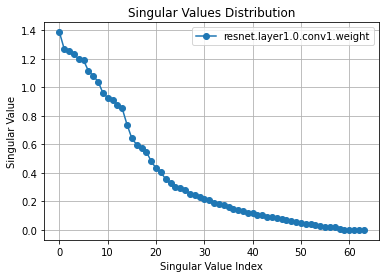

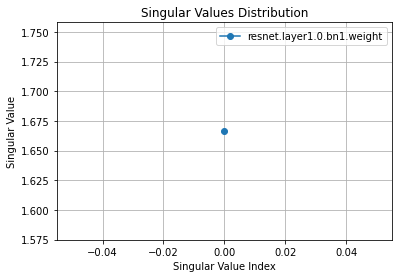

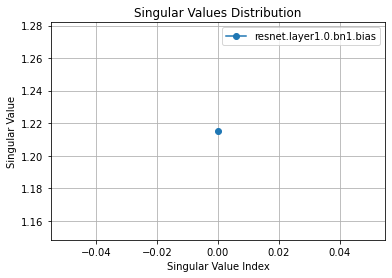

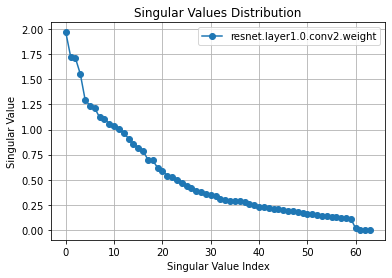

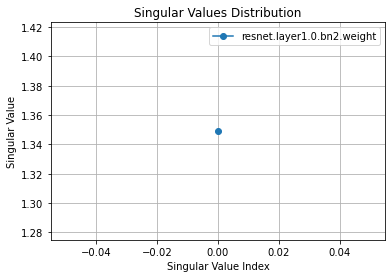

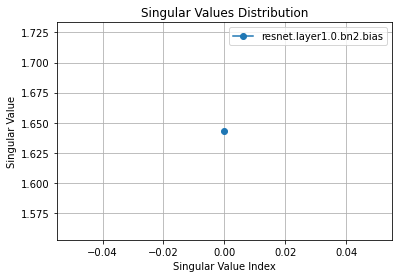

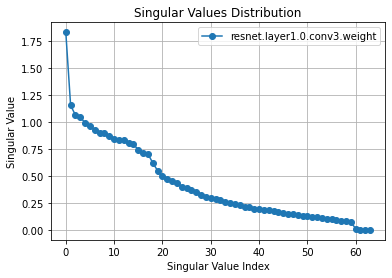

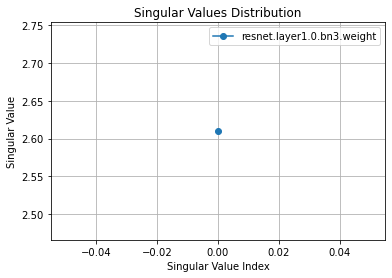

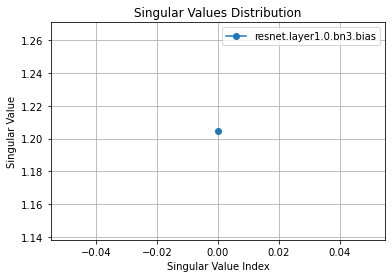

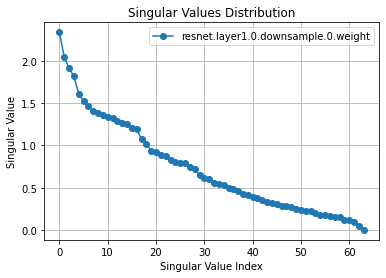

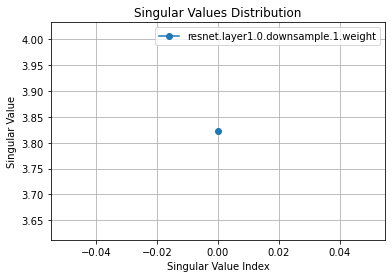

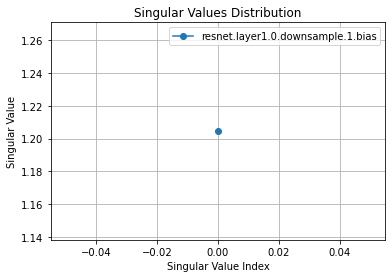

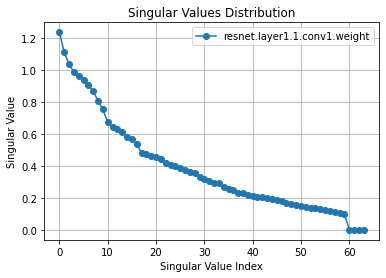

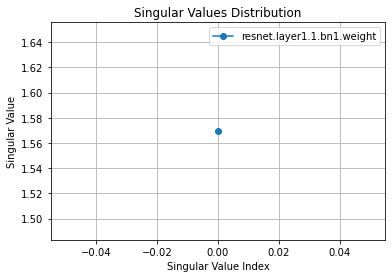

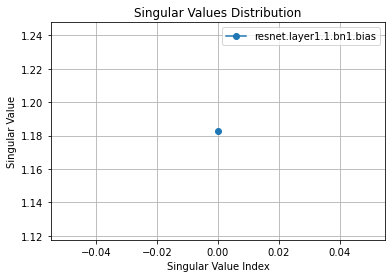

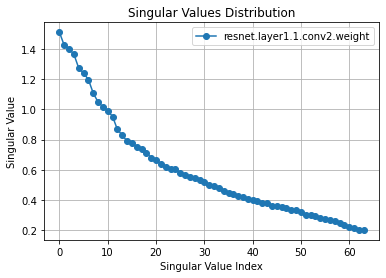

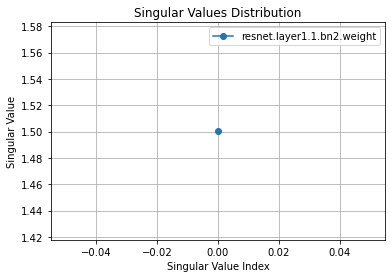

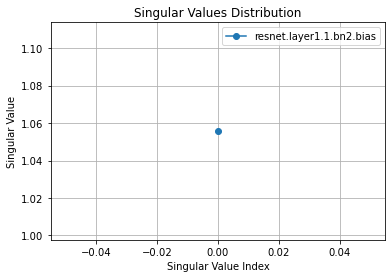

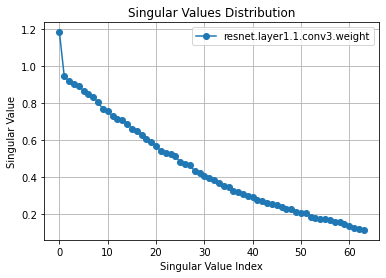

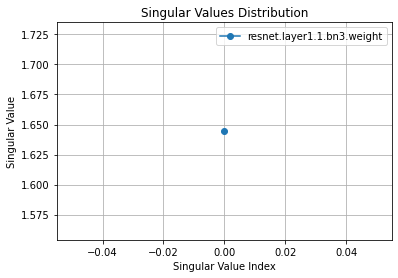

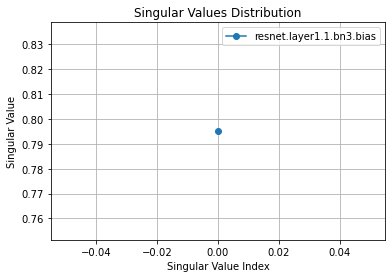

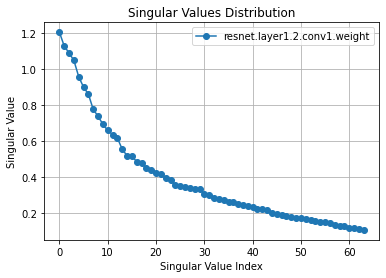

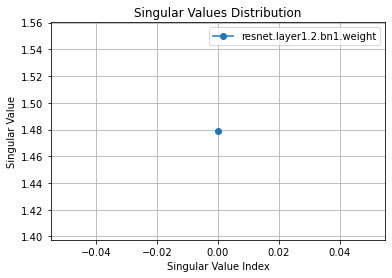

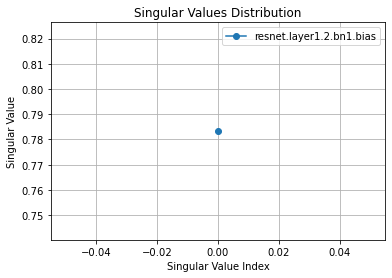

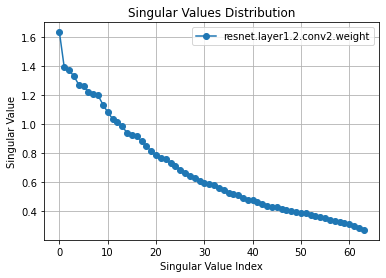

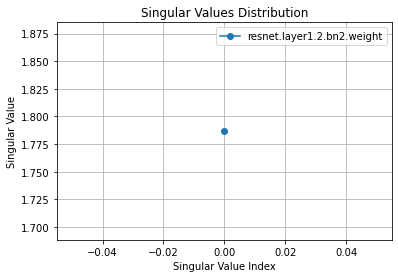

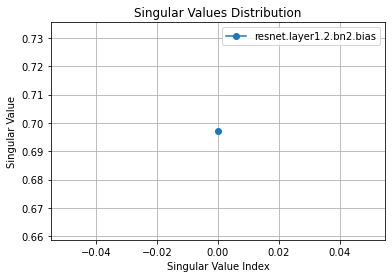

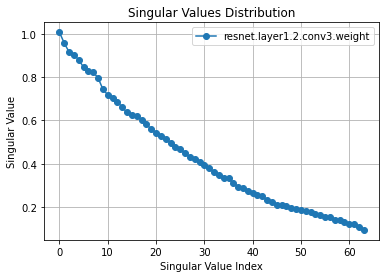

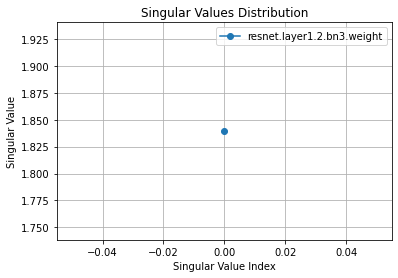

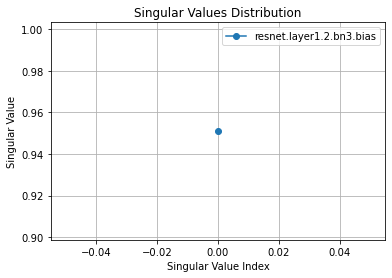

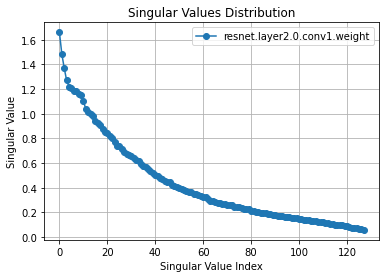

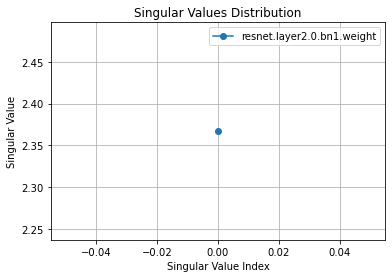

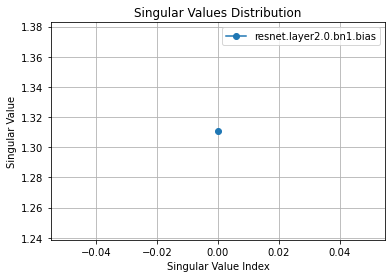

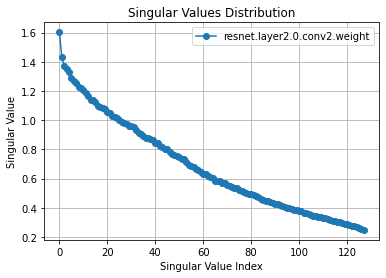

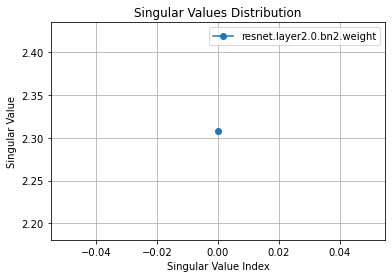

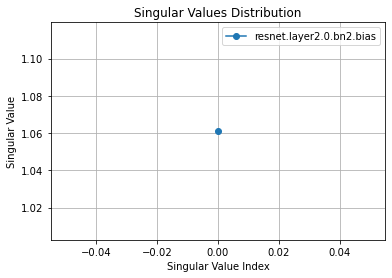

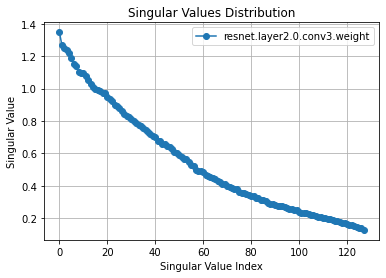

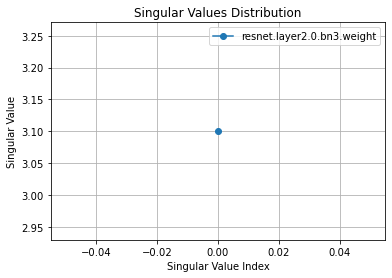

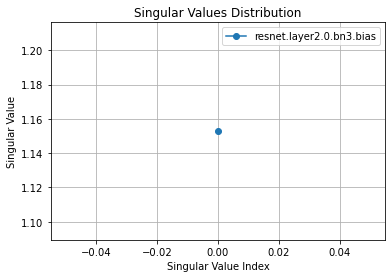

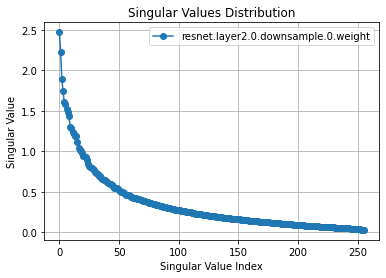

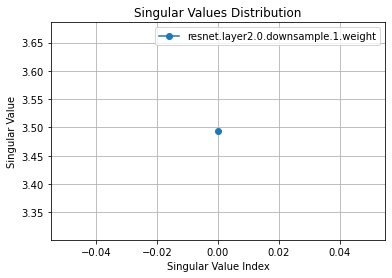

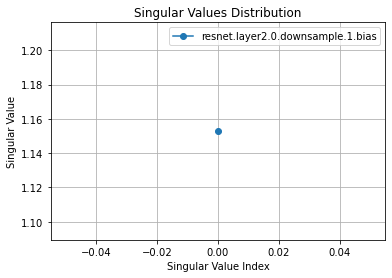

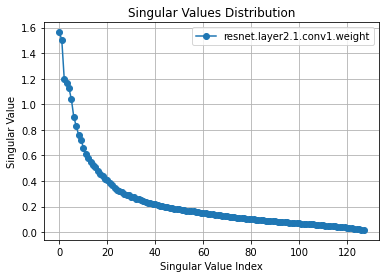

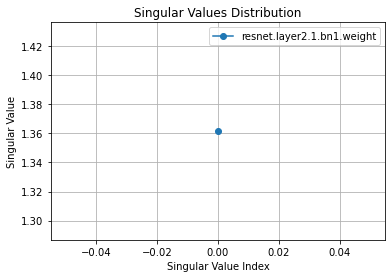

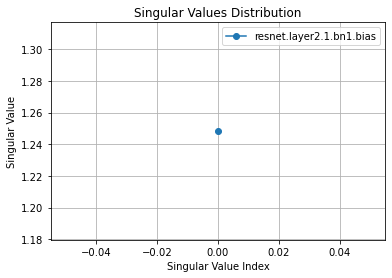

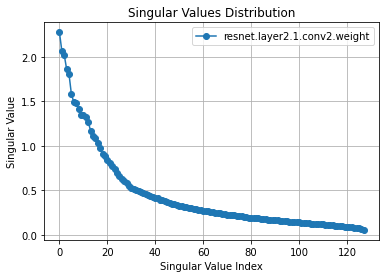

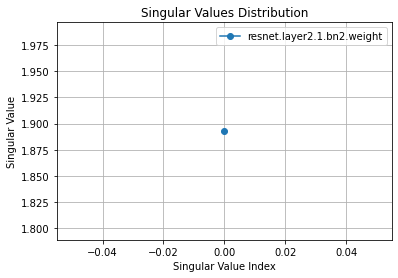

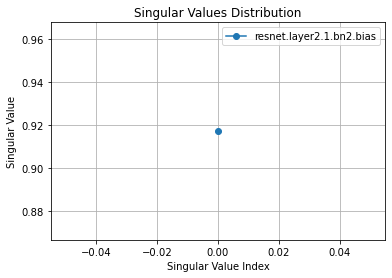

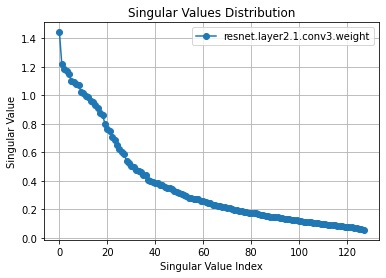

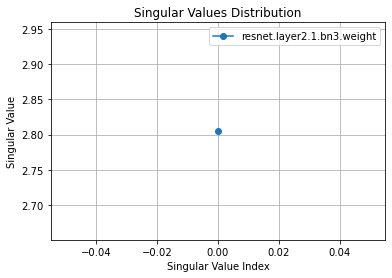

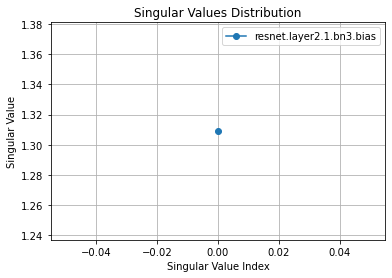

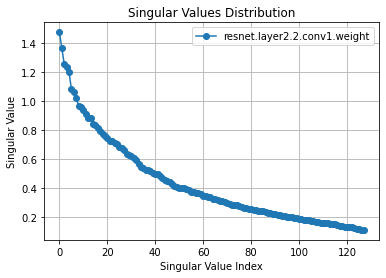

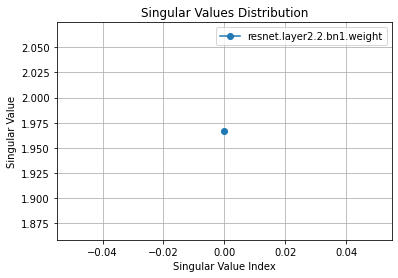

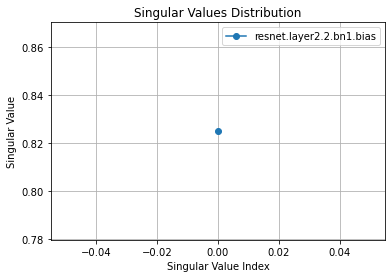

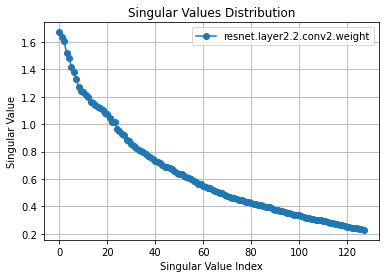

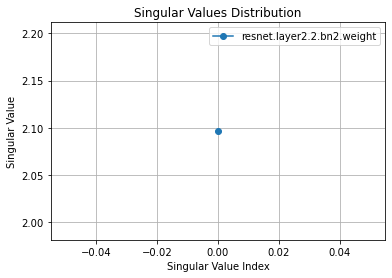

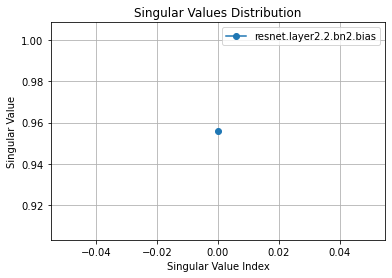

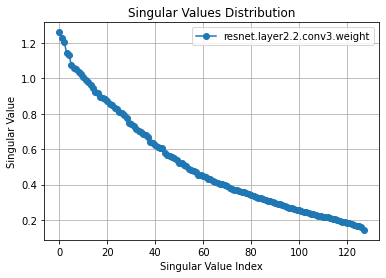

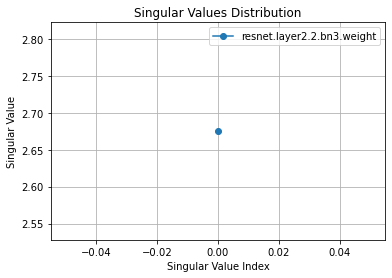

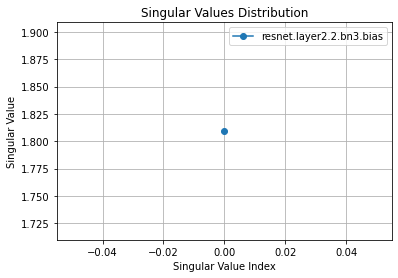

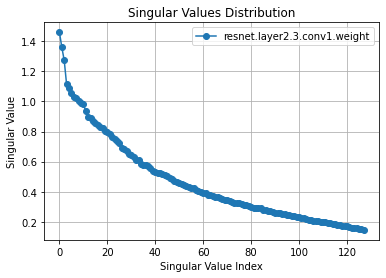

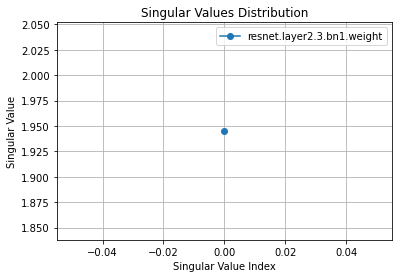

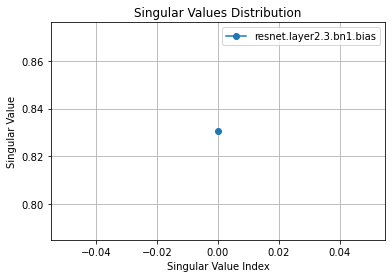

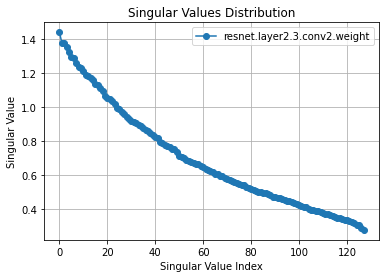

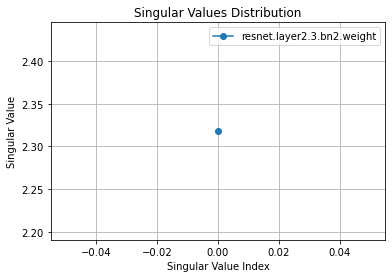

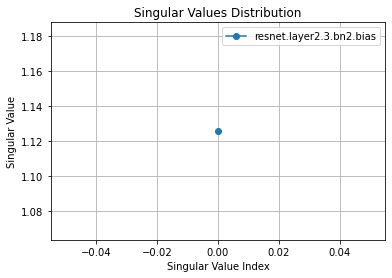

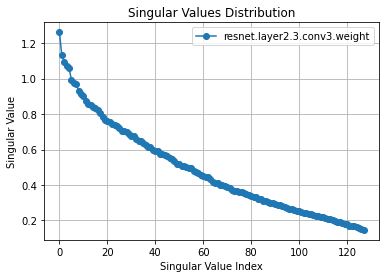

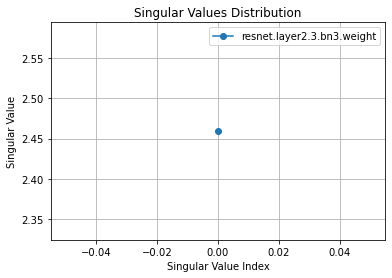

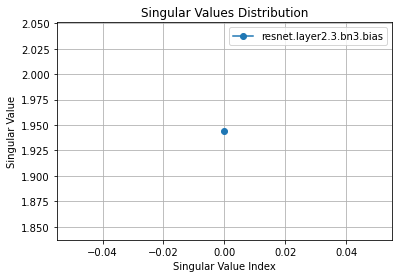

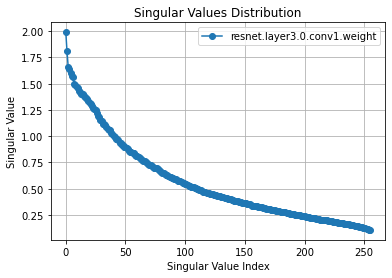

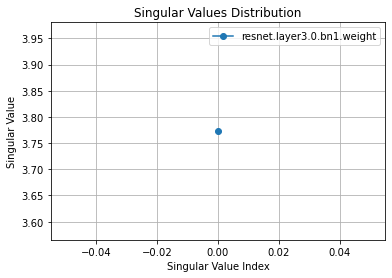

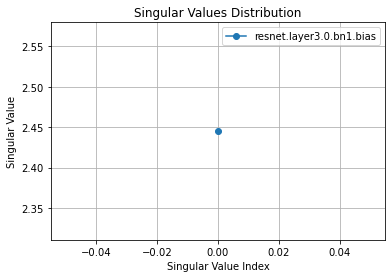

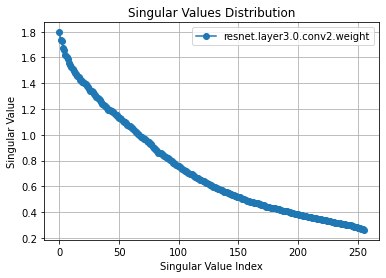

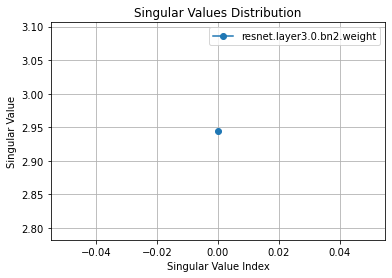

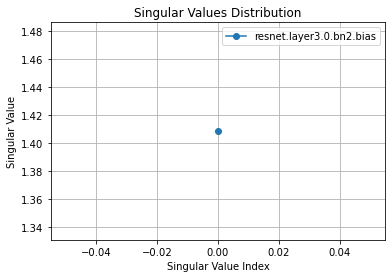

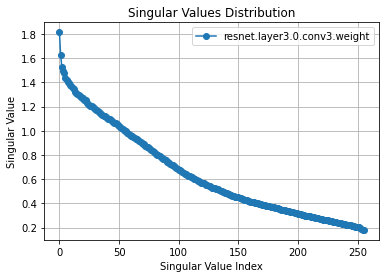

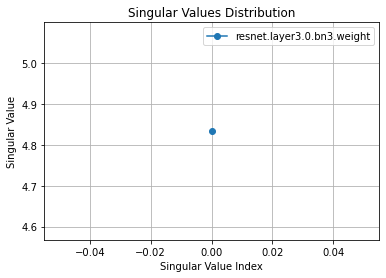

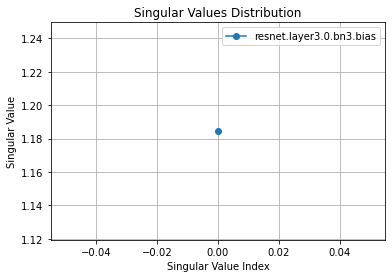

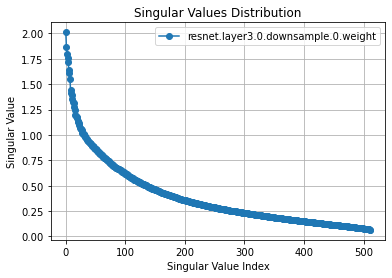

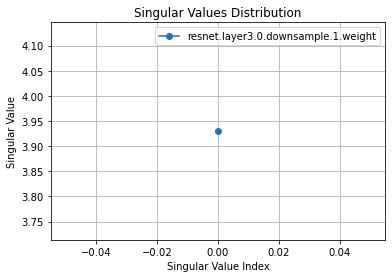

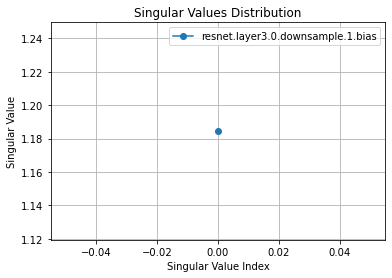

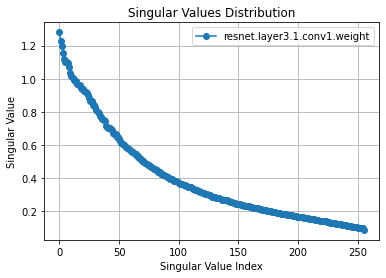

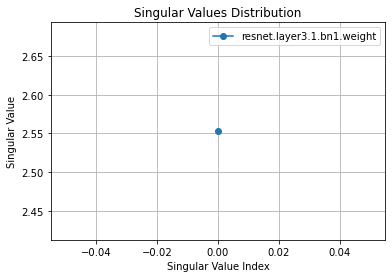

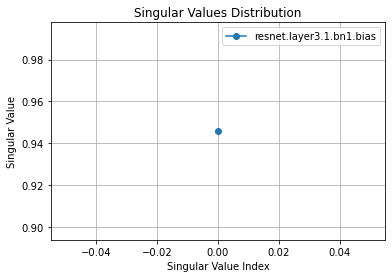

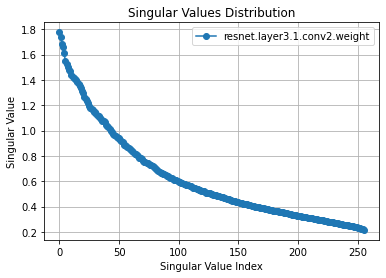

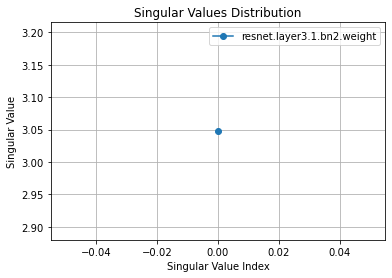

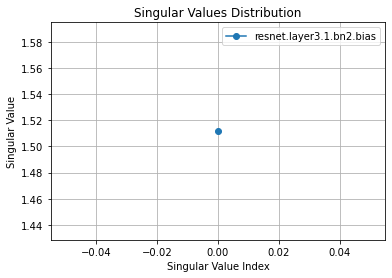

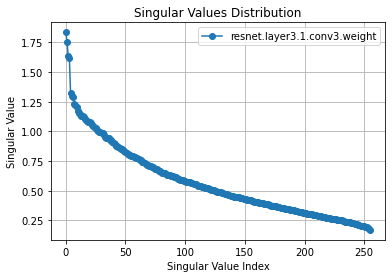

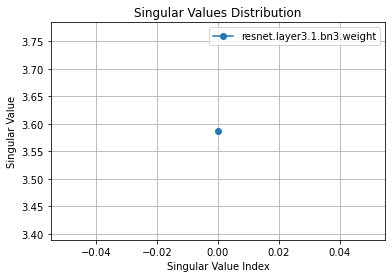

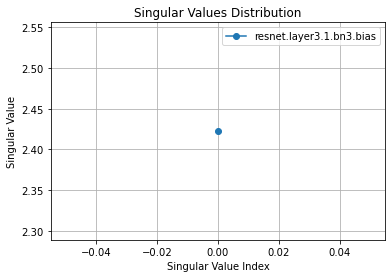

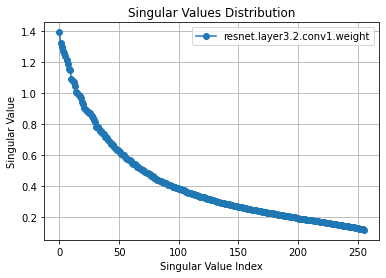

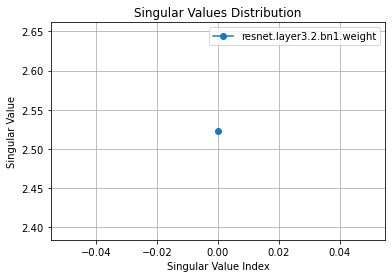

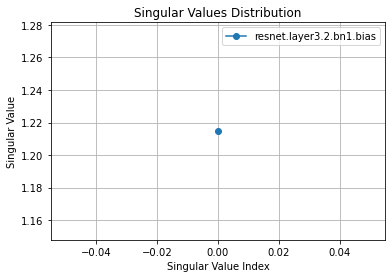

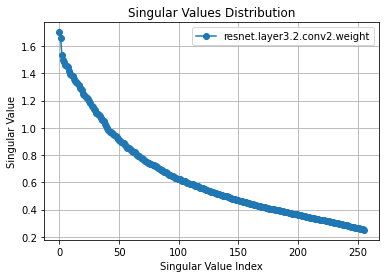

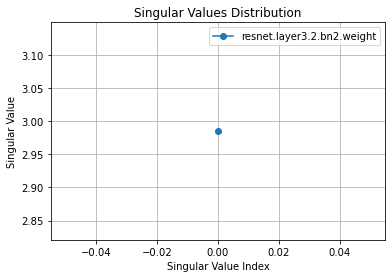

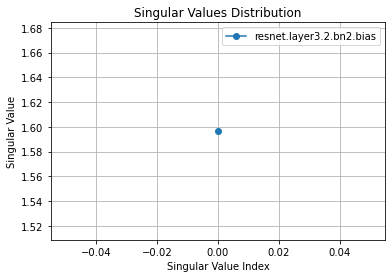

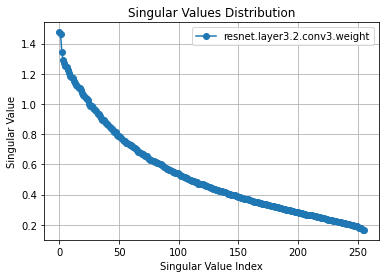

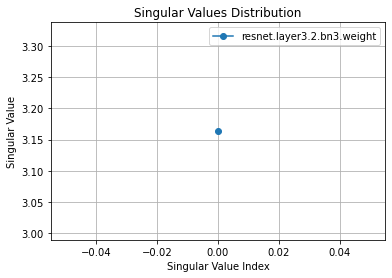

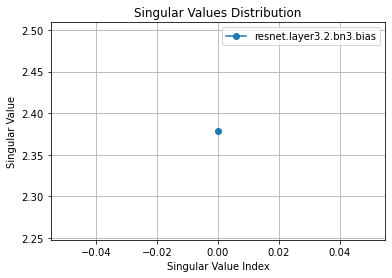

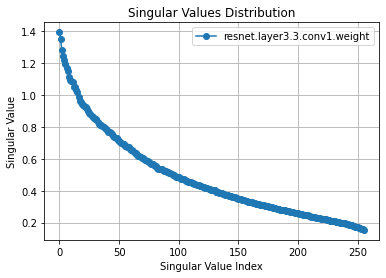

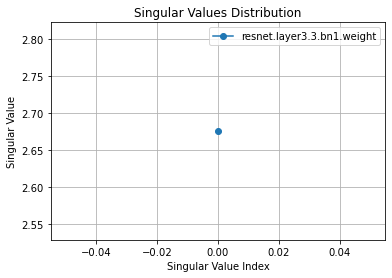

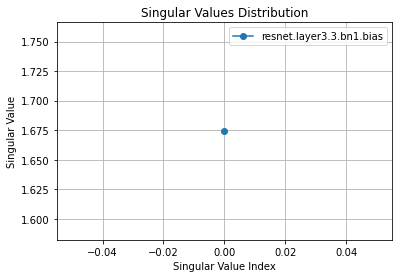

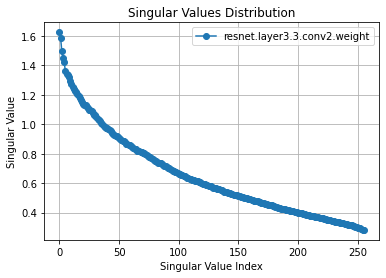

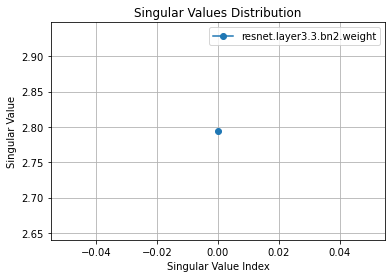

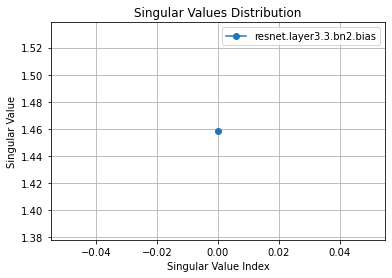

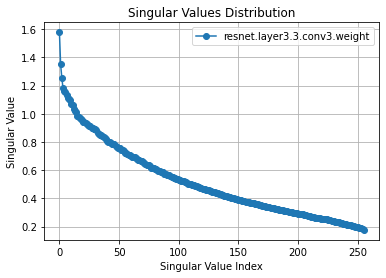

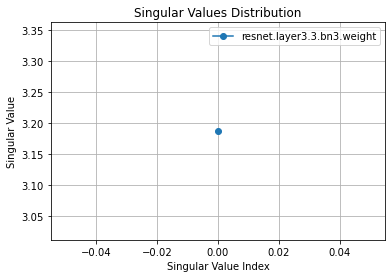

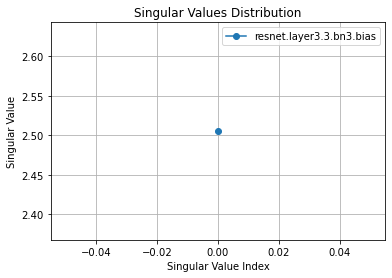

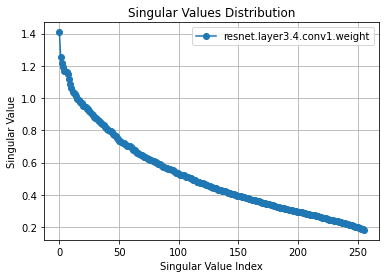

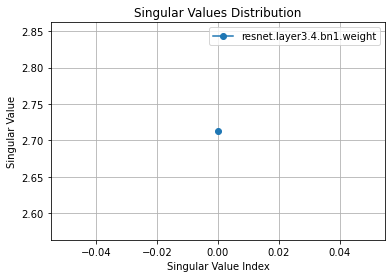

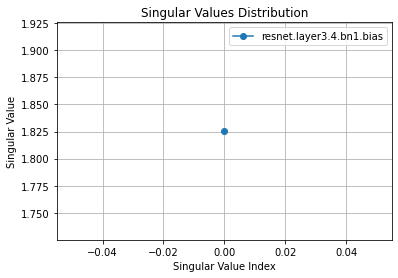

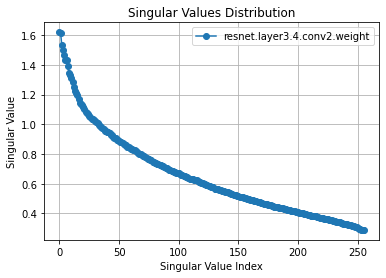

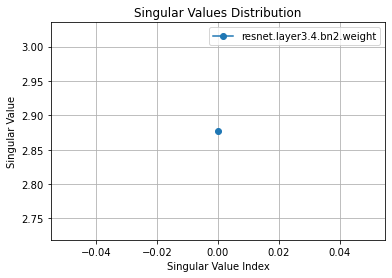

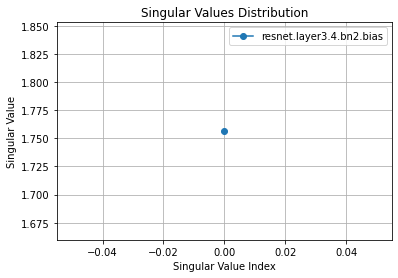

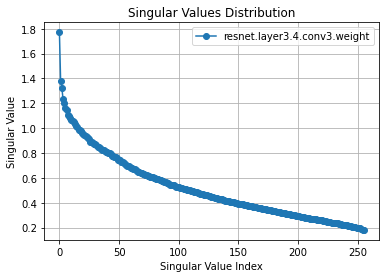

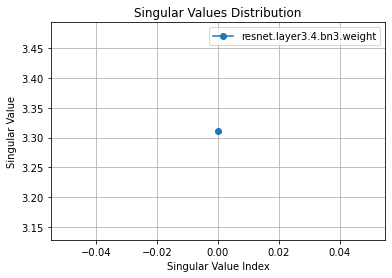

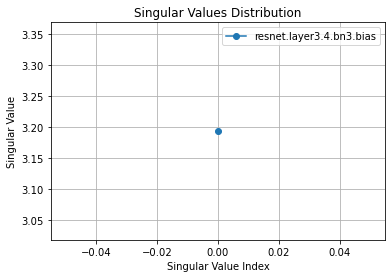

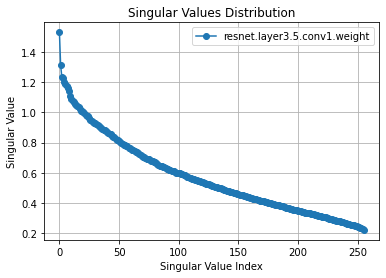

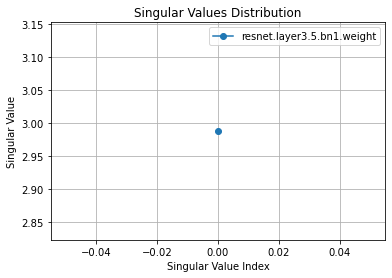

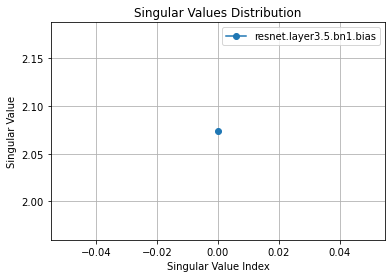

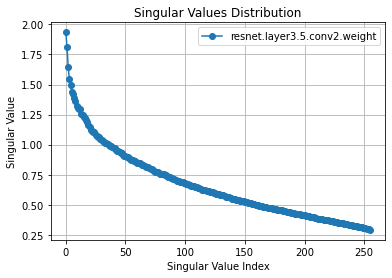

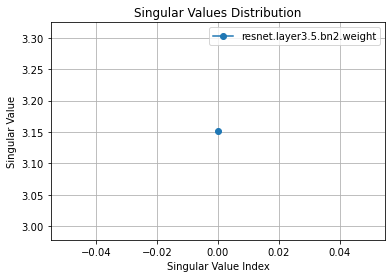

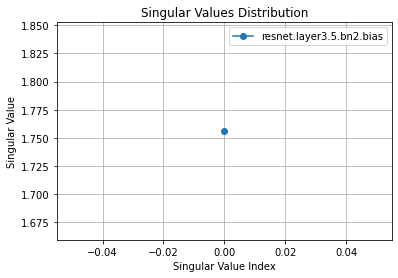

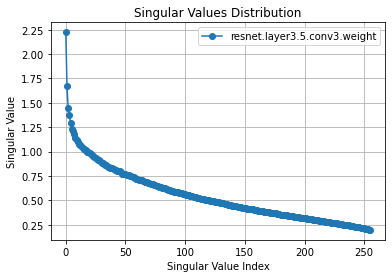

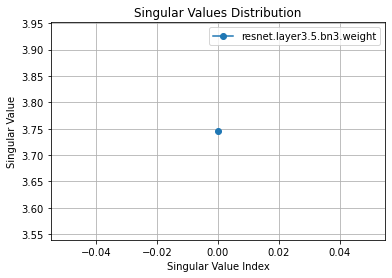

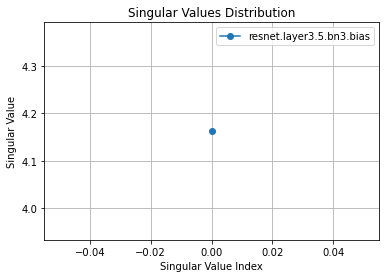

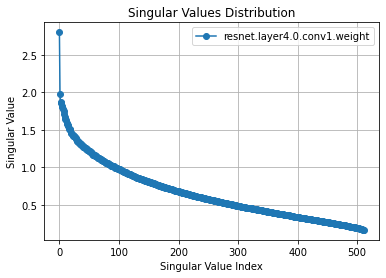

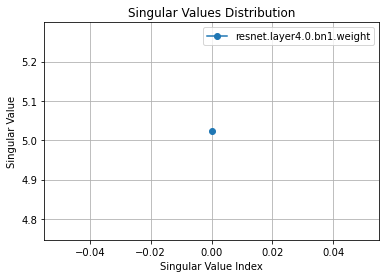

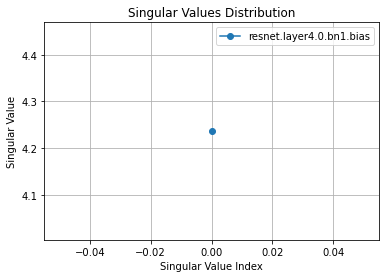

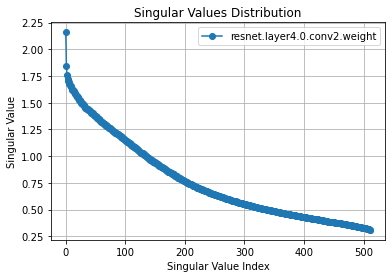

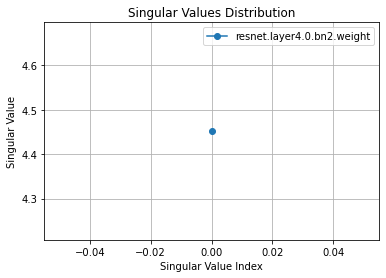

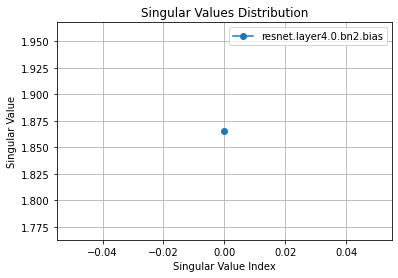

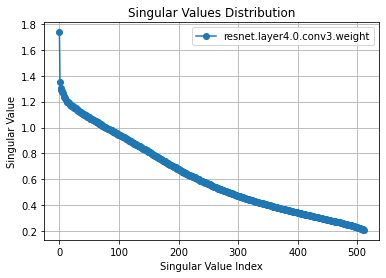

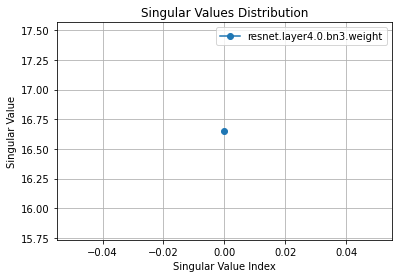

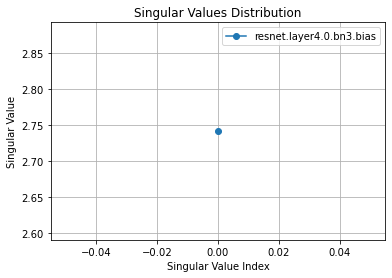

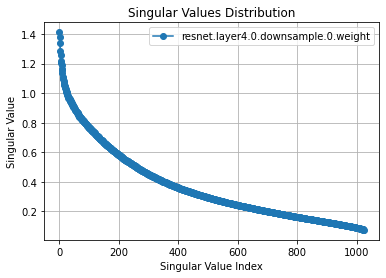

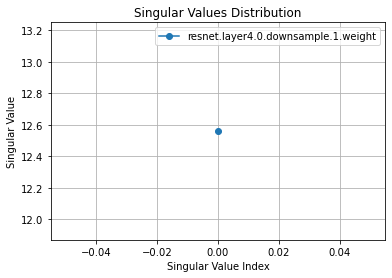

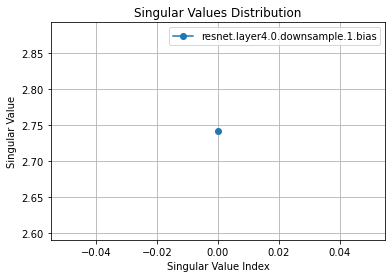

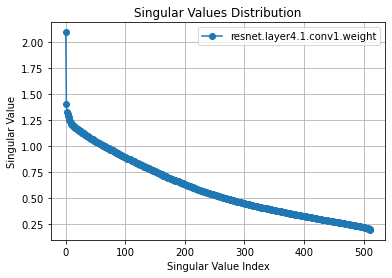

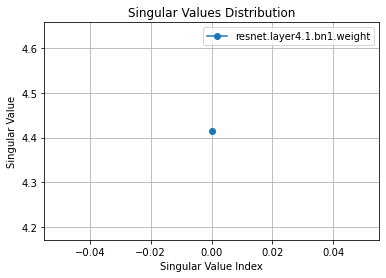

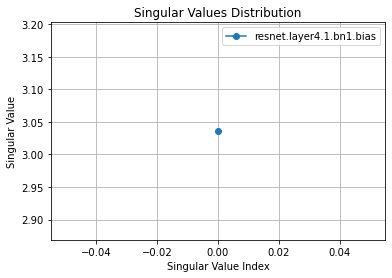

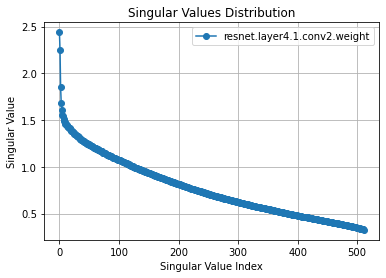

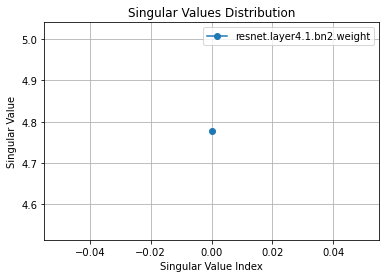

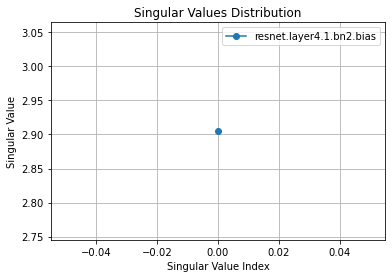

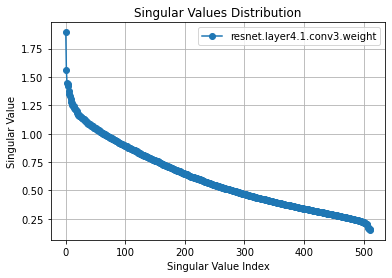

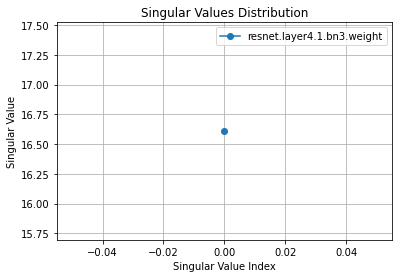

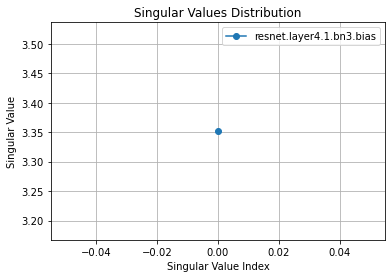

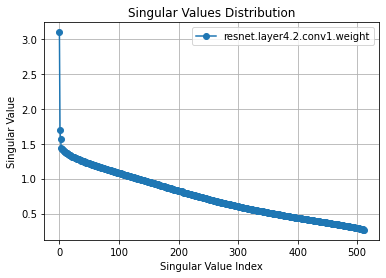

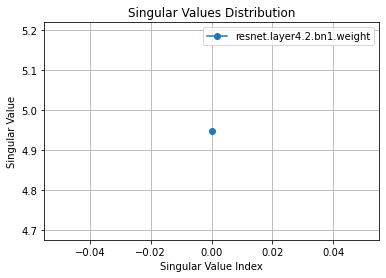

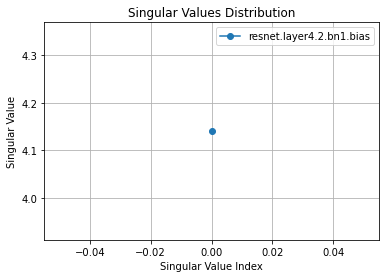

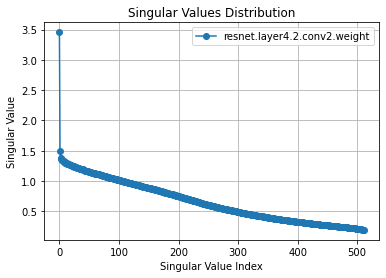

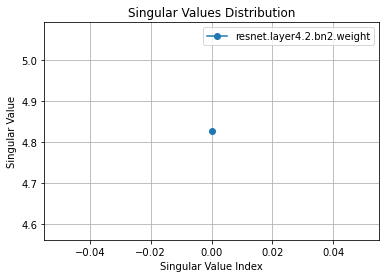

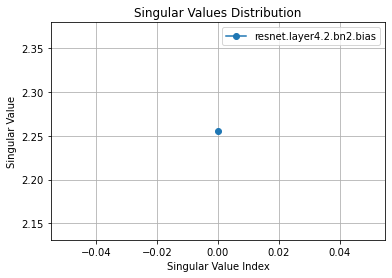

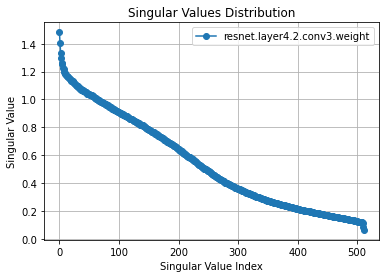

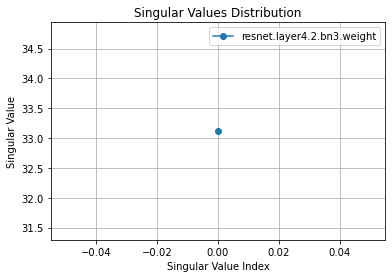

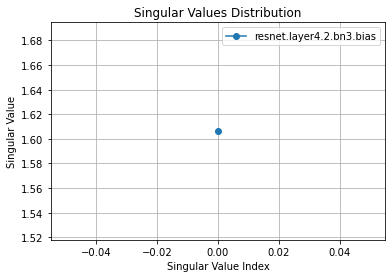

In [16]:
import matplotlib.pyplot as plt

def plot_singular_values(S, layer_name):
    # Convert the singular values to a numpy array for plotting
    singular_values = S.numpy()
    
    # Plot the singular values using a linear scale
    plt.plot(singular_values, marker='o', label=layer_name)
    plt.xlabel('Singular Value Index')
    plt.ylabel('Singular Value')
    plt.title('Singular Values Distribution')
    plt.grid(True)
    plt.legend()
    plt.show()

# Iterate through layers and plot singular values
for layer_name, weight_matrix in pretrained_weights.items():
    U, S, Vt = reshape_and_svd(weight_matrix)
    plot_singular_values(S, layer_name)